# Анализ успешности компьютерных игр

Цель проекта - исследование рынка компьютерных игр, анализ факторов успешности игр, формирование рекомендаций для запуска нового успешного продукта. <br>
<br>
В рамках данного исследования планируется выполнить задачи:<br>
    1. Знакомство с данными. Общий обзор, предварительное знакомство с типами данных, наличием пропусков.<br>
    2. Предварительная обработка данных.<br>
        2.1 Поиск пропусков, заполнение пропусков приемлемыми данными, где это возможно.<br>
        2.2 Поиск и удаление явных и неявных дубликатов.<br>
        2.3 Преобразование типов данных, где это необходимо.<br>
        2.4 Проведение дополнительных расчётов и формирование дополнительных столбцов с данными при необходимости.<br>
    3. Проведение исследовательского анализа данных.<br>
        3.1 Анализ популярности различных игровых платформ.<br>
        3.2 Выбор актуального периода для анализа данных. <br>
        3.3 Анализ популярности различных игровых жанров.<br>
        3.4 Анализ влияния оценки критиков и пользователей на продажи.<br>
    4. Формирование портрета пользователя в зависимости от региона проживания:<br>
        4.1 Топ-5 популярных платформ для различных регионов.<br>
        4.2 Топ-5 популярных жанров для различных регионов.<br>
        4.3 Влияние рейтинга ESRB на продажи игр.<br>
    5. Статистический анализ данных. Проверка гипотез.<br>
        5.1 Гипотеза о равеснтве средних пользовательских рейтингах платформ PC и XOne. <br>
        5.2 Гипотеза о неравенстве средних пользовательских рейтингов жанров Action и Sports. <br>
    6. Выводы и рекомендации.

## 1. Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    games = pd.read_csv('C:/Users/Azerty/Downloads/games.csv')
except Firstexception:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except FileNotFoundError:
    display('Файл не найден.')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод. <br>
Первоначальный обзор данных показал недостатоное качество данных - имеются пропуски, типы данных в некоторых столбцах требуют изменения для дальнейшего использования в анализе.
Пропуски в данных могут быть как следствием утери данных со временем (слишком старые данные), так и недостатком данных для новых игр(ещё не проведена оценка).
Отсутствие данных по рейтингу может быть вызвано тем, что издатель игры просто не отправлял её на рейтингование, т.к. не нуждается в этом.
Кроме того потеря данных могла произойти по техническим причинам.**

## 2. Предобработка данных

Приведём наименования столбцов к нижнему регистру.

In [6]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Метод info() указал нам на наличие пропусков в датасете (количество ненулевых значений не равно общему количеству значений в некоторых стобцах). Уточним ещё раз наличие пропусков в каждом столбце.

In [7]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Количество пропусков в столбце с наименованием игры - 2. это очень маленькое значение относительно количества данных в датасете, поэтому потеря этих данных не исказит исходные данные. Удалим эти 2 строки.

In [8]:
games = games.dropna(subset=['name'])

Уточним, какие уникальные значения имеются в наборе данных в столбцах rating и user_score.

In [9]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [10]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score помимо пропусков имеется значение tbd. Посмотрим, как часто оно встречается.

In [11]:
games[games['user_score'] == 'tbd']['user_score'].count()

2424

2424 - достаточно большое количество, пренебречь этими данными мы не можем. Нужно заменить это значение.

Проверим датасет на наличие явных дубликатов.

In [12]:
games.duplicated().sum()

0

Явные дубликаты отсутствуют. <br>
Проверим датасет на наличие неявных дубликатов. <br>
Для этого будем искать одновременные совпадения в столбцах name, platform, year_of_release, genre.

In [13]:
duplicaterows = games[games\
.duplicated(['name', 'platform', 'year_of_release', 'genre'])]
display(duplicaterows)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [14]:
duplicaterows1 = games[games\
.duplicated(['name', 'platform', 'year_of_release'])]
display(duplicaterows1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Найден один неявный дубликат. Удалим эту строку.

In [15]:
games = games.drop(index = 16230)

Заполним пропуски в столбце с годом выпуска игр. <br>
Игровые платформы развиваются со временем. Параллельно с техническим прогрессом и развитием технологий и одни платформы устаревают, другие появляются им взамен. <br>
Поэтому заполним пропуски в столбце с годом издания медианным значением года выпуска по каждой уникальной платформе.

In [16]:
for l in games['platform'].unique():
    games.loc[(games['platform'] == l) & (games['year_of_release'].isna()), 'year_of_release'] = \
    games.loc[(games['platform'] == l), 'year_of_release'].median()    

Необходимо заменить значение tbd в столбце пользовательских рейтингов.<br>
tbd расшифровывается как to be determined, т.е. "будет определено". <br>
Получается, что для игр с данной аббревиатурой пользовательский рейтинг ещё не определён. <br>
Возможно, это характерно для новых игр, выпущенных совсем недавно. <br>
Проверим.

In [17]:
g1 = games[games['user_score'] == 'tbd']
g1.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [18]:
g1.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,1082.000000
mean,2007.443069,0.126052,0.043519,0.002727,0.015862,60.711645
std,3.474103,0.180586,0.111412,0.026136,0.039156,11.193035
min,1997.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,54.000000
50%,2008.000000,0.075000,0.010000,0.000000,0.010000,62.000000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000


Мы видим, что данная аббревиатура встречается для самых разных годов выпуска игр, а значит, эта оценка уже не будет определена.<br>
Некоторые из этих игр, возможно, вообще уже не используются.<br>
Чтобы не искажать данные, заменим данную аббревиатуру на явно отличающееся число, которое впоследствии отфильтруем при анализе.

In [19]:
games['user_score'] = games['user_score'].replace('tbd', 1000)

Изменим тип данных для столбцов year_of_release - это явно целочисленные значения и user_score - это дробные числовые значения.

In [20]:
games = games.astype({'year_of_release':'int', 'user_score':'float'})

In [21]:
for a in games['genre'].unique():
    games.loc[(games['genre'] == a) & (games['user_score'].isna()), 'user_score'] = \
    games.loc[(games['genre'] == a), 'user_score'].median()    

In [22]:
for b in games['genre'].unique():
    games.loc[(games['genre'] == b) & (games['critic_score'].isna()), 'critic_score'] = \
    games.loc[(games['genre'] == b), 'critic_score'].median()    

Исследуя все имеющиеся в оценке ESRB рейтинги мы обнаружили рейтинг 'RP', что обозначает 'Rating Panding', т.е. рейтинг для данной игры в данный момент отстутствует.<br>
Предлагаю заменить пропуски в столбце rating значением 'RP'.<br>
Это будет обозначать, что рейтинг не установлен, и не полияет на другие рейтинги.

In [23]:
games['rating'] = games['rating'].fillna('RP')

In [24]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Рассчитаем глобальные продажи для каждой игры - суммарно по всем регионам.

In [25]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

**Вывод. <br>
Проведена работа по предобработке данных. <br>
Выявлены и заполнены пропуски.<br>
Выявлены и устранены явные и неявные дубликаты.<br>
Изменены типы данные на более подходящие для анализа. <br>
Данные готовы к дальнейшему анализу.**

## 3. Исследовательский анализ данных

Посмотрим, как менялось количество выпускаемых игр по годам.

In [26]:
games_per_years = games.pivot_table(index='year_of_release', values='na_sales', aggfunc='count')
games_per_years.columns = ['count']
games_per_years

,count
year_of_release,
1980,9
1981,46
1982,53
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Пик выпуска компьютерных игр пришёлся на 2006-2011 годы. <br>
До 2006 года малое количество компьютерных игр было, вероятно, обусловлено низким уровнем технических возможностей и малым распространением игровых консолей. <br>
После 2011 года выпуск игр для игровых консолей пошёл на спад. <br>
Предположу, что это связано с появлением большого количества онлайн-игр, не требующих приобретения игровых консолей и позволяющих играть с любого устройства бесплатно без приобретения игры.

Посмотрим на популярность различных игровых платформ (суммарные продажи для каждой платформы).

In [27]:
aggfunc = {'total_sales' : 'sum'}
best_platforms = games.groupby(['platform']).agg(aggfunc)
best_platforms.columns = ['sum_sales']
best_platforms.sort_values(by='sum_sales', ascending=False)

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


В рейтинге популярности лидируют такие платформы как PS2, X360, Wii, PS3. <br>
Вполне возможно, что срок жизни этих платформ как раз пришёлся на пик популярности игр в целом, поэтому и продажи по ним существенно выше, чем по другим платформам.

Построим графики "жизни" самых популярных платформ, чтобы определить срок их жизни - за какой период платформа набирает популярность и отмирает.

In [28]:
def platforms_per_years(w):
    data = games[games['platform'] == w]
    data_per_years = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    data_per_years.columns = ['sum_sales']
    data_per_years.plot(style='o-')
    plt.title('Период жизни платформы')
    plt.xlabel('год')
    plt.ylabel('количество продаж, млн копий')
    x_ticks = data['year_of_release'].unique()
    plt.xticks(ticks=x_ticks, rotation=90)
    plt.legend().set_visible(False);

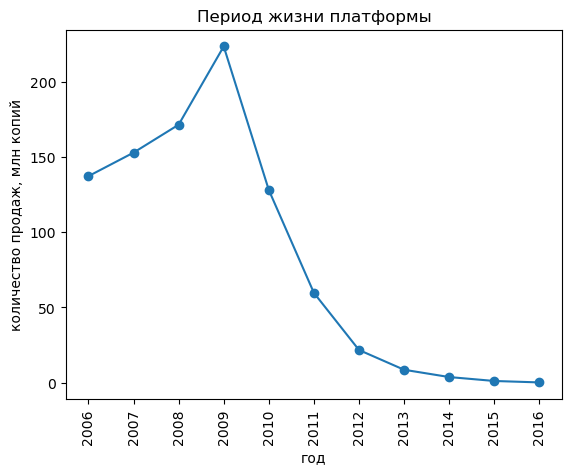

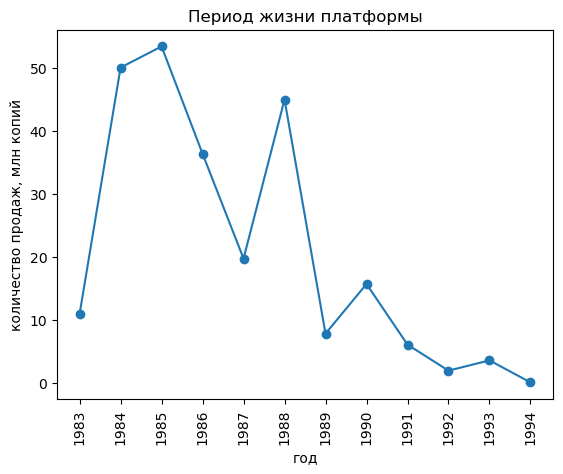

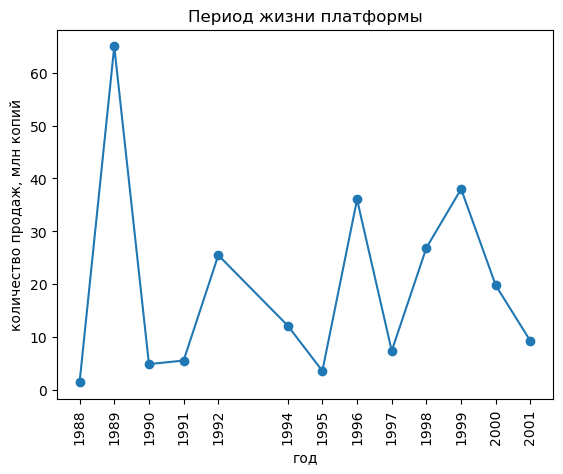

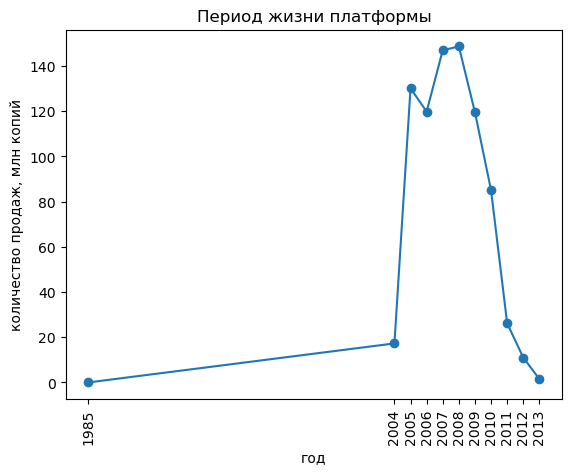

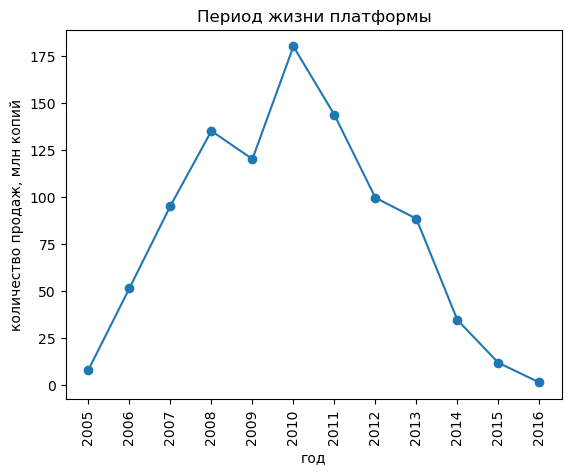

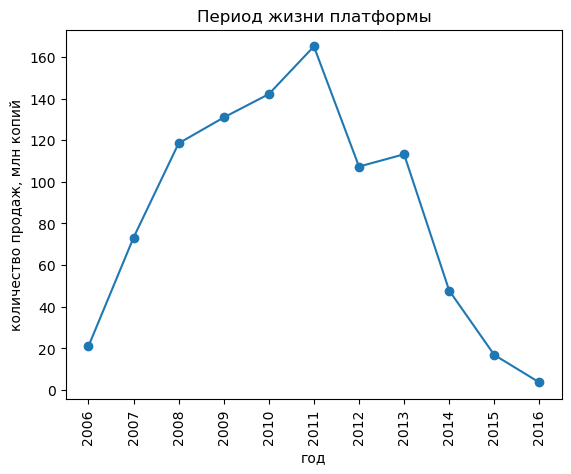

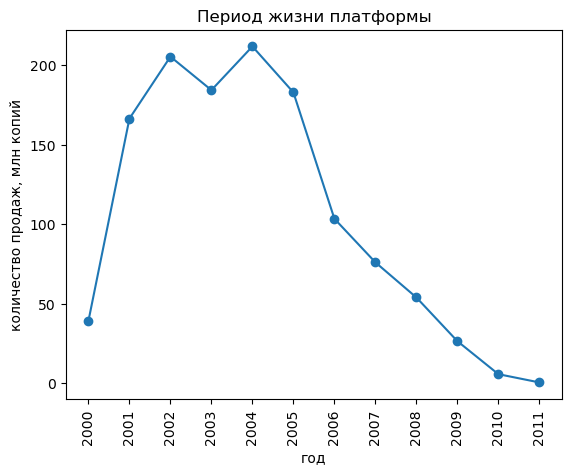

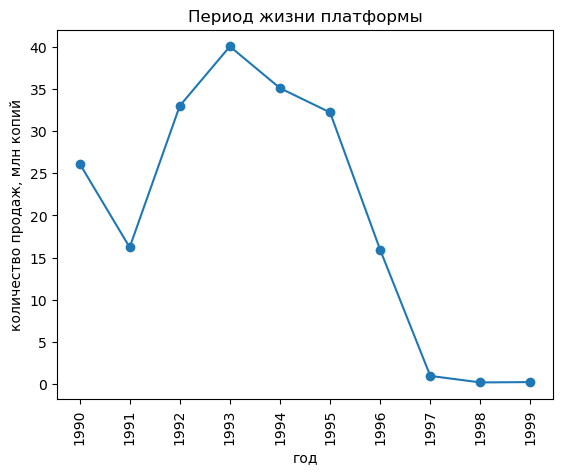

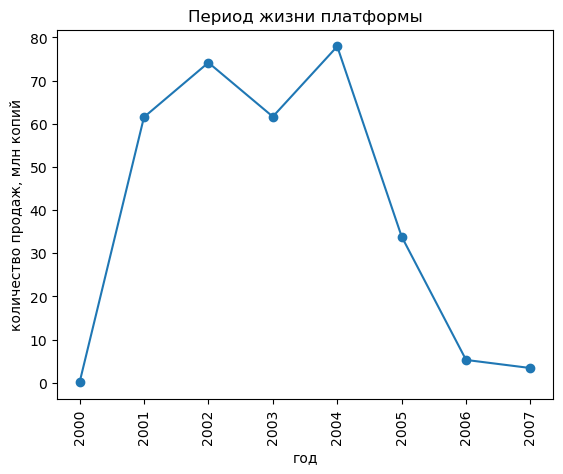

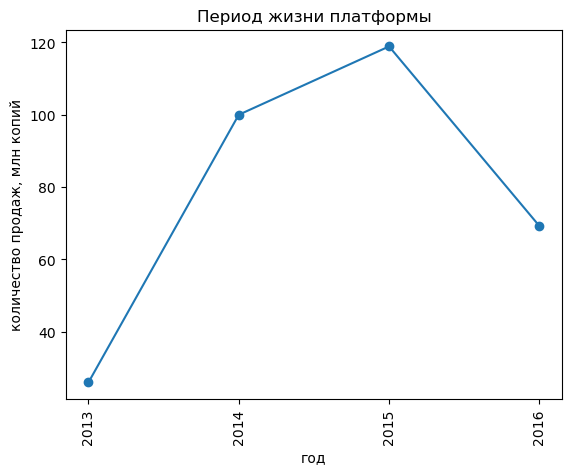

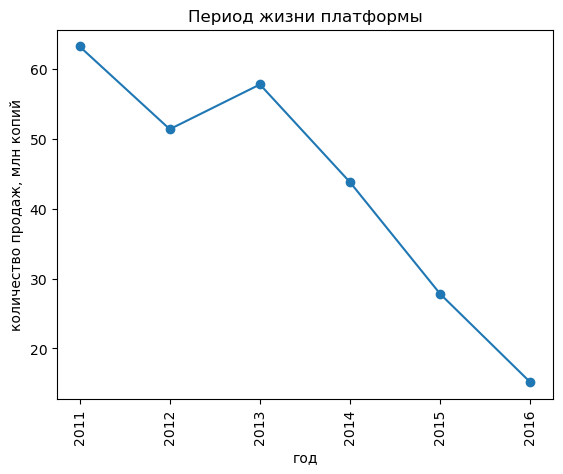

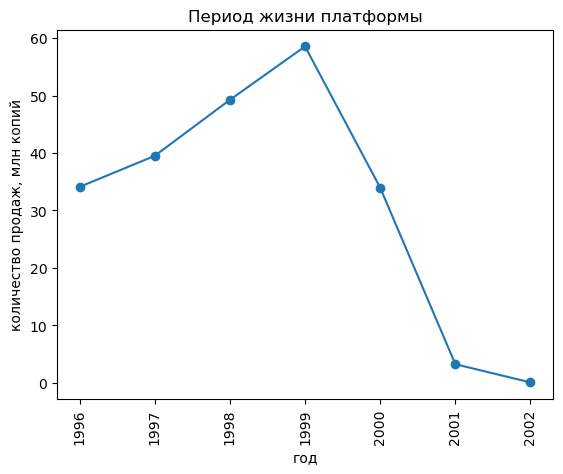

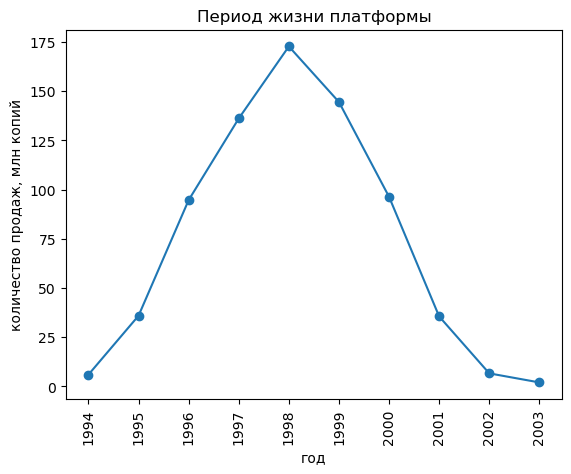

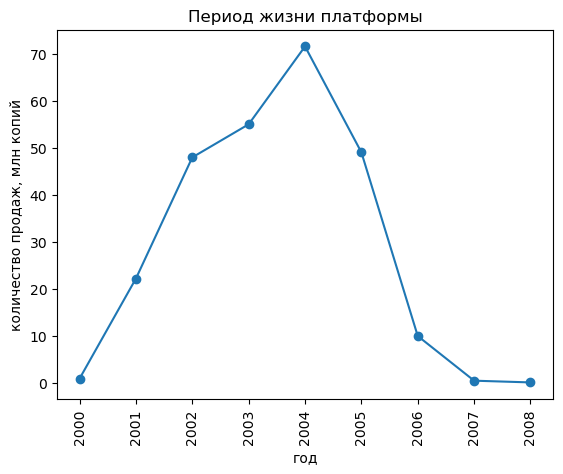

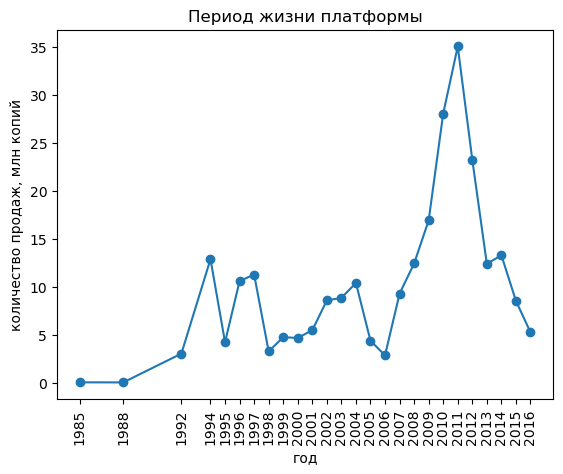

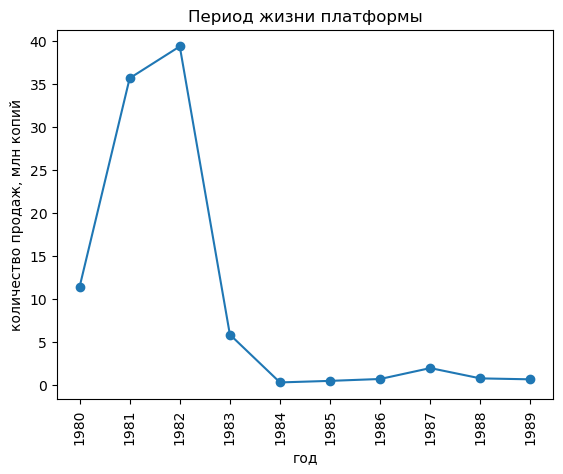

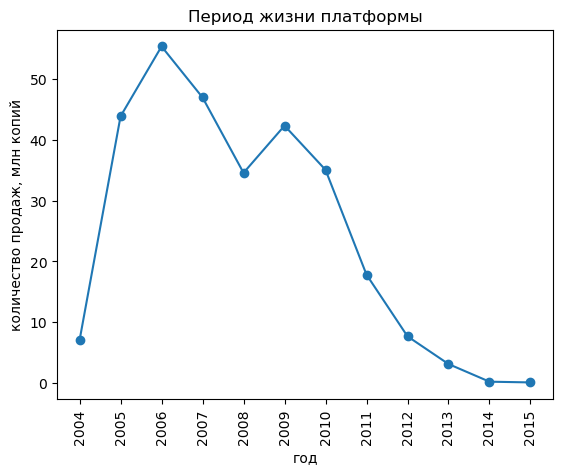

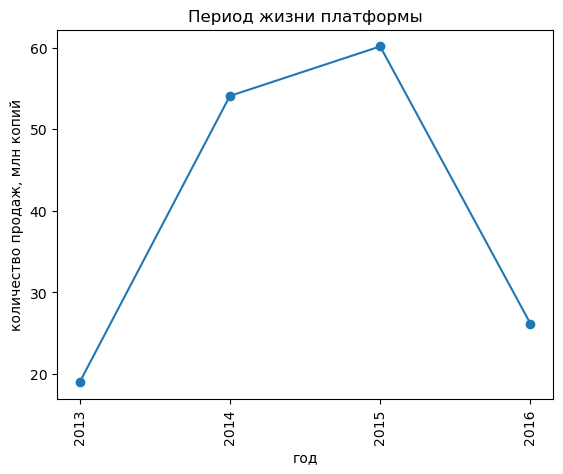

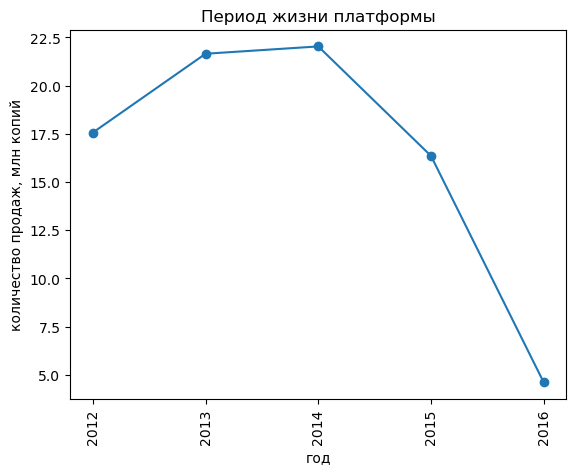

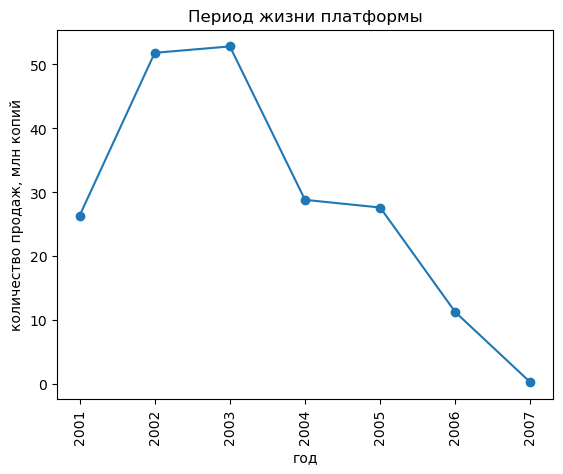

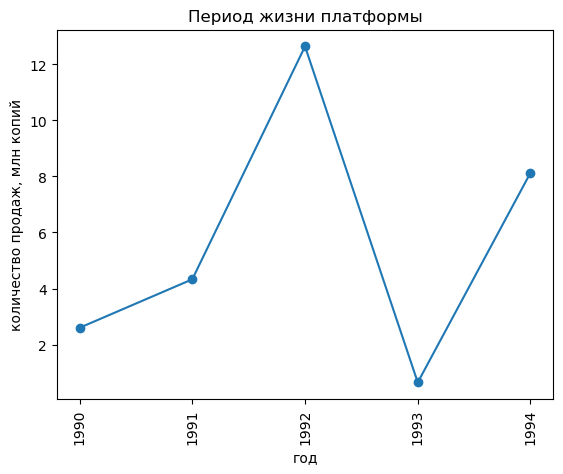

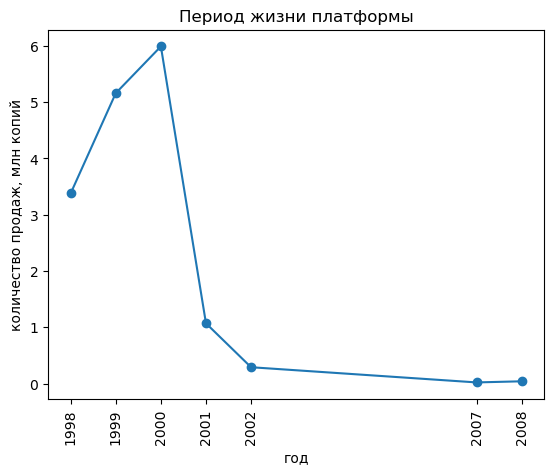

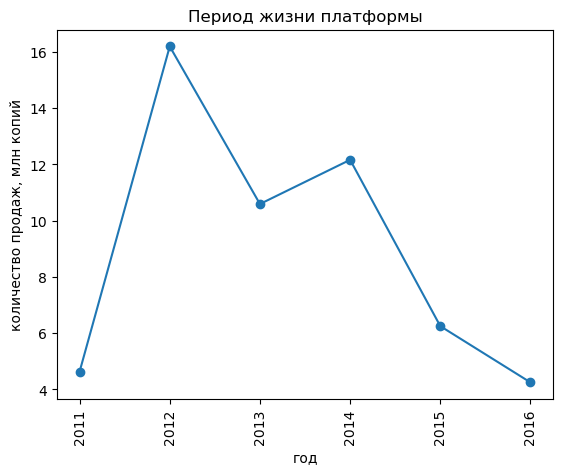

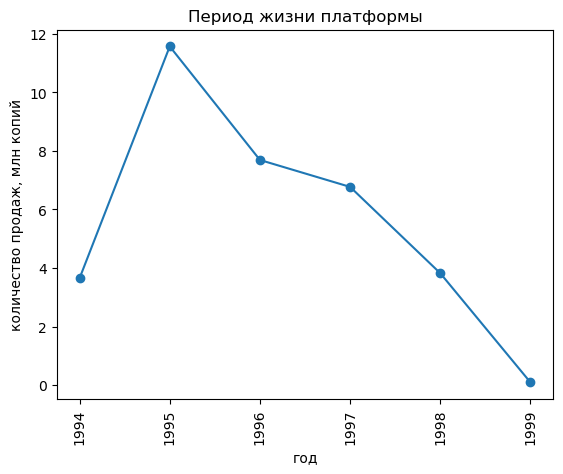

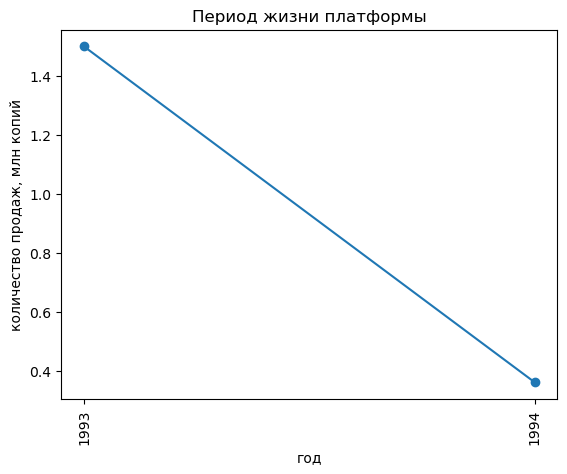

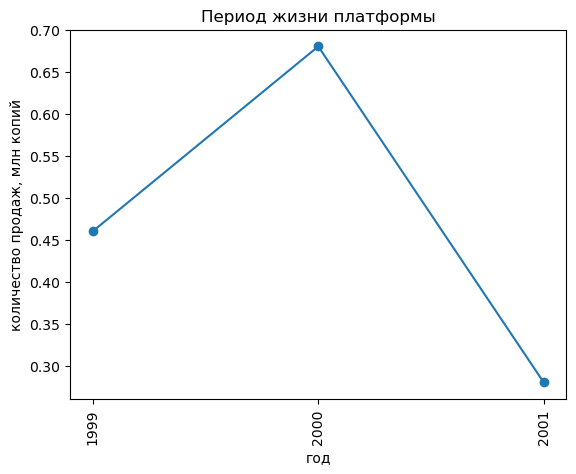

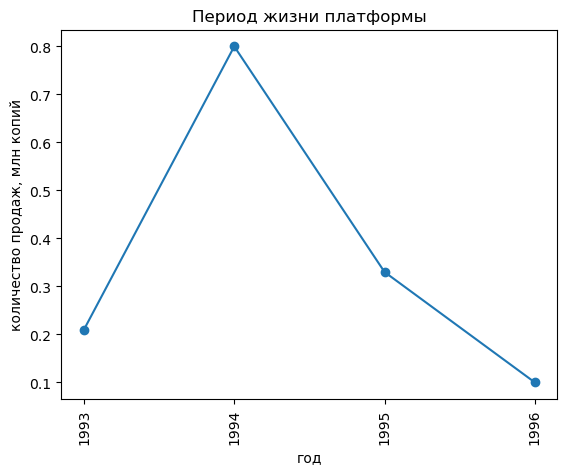

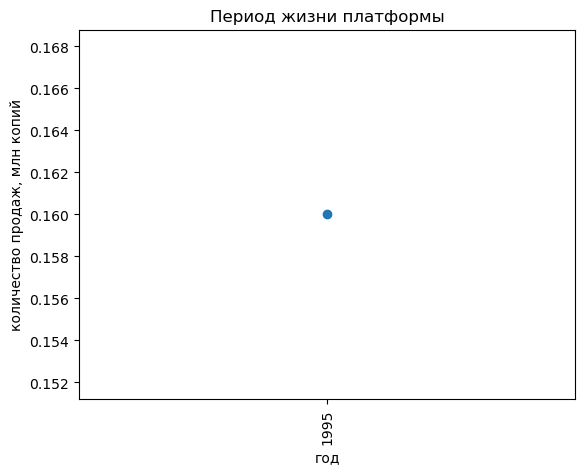

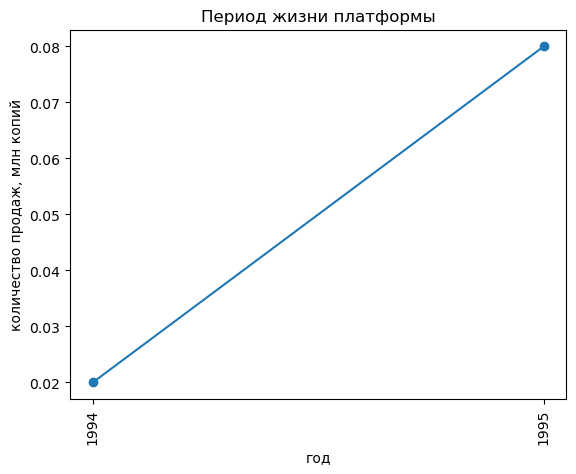

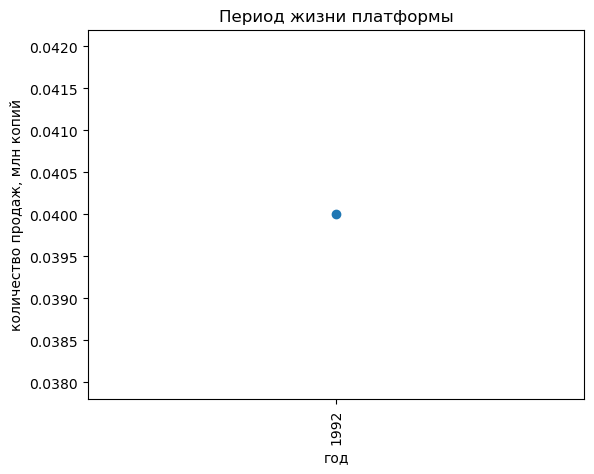

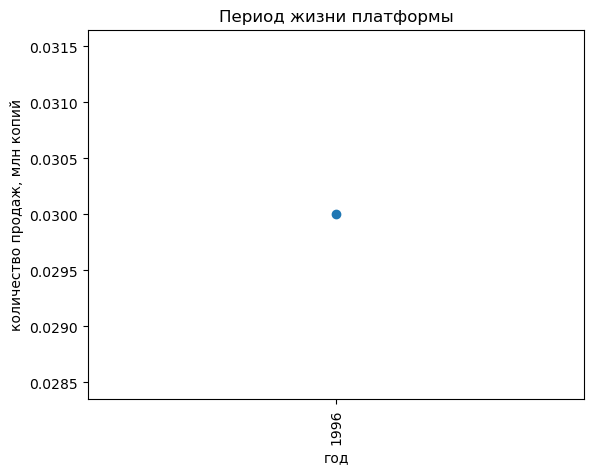

In [29]:
platforms = games['platform'].unique()
for p in platforms:
    platforms_per_years(p)

Продолжительность жизни платформ составляет примерно 10 лет. При этом пик как правило приходится на 3-5 год существования платформы. Поэтому предлагается взять период исследования данных - последние 3 года, чтобы последующий год пришелся на пик популярности платформ.

In [30]:
games_actual = games.query('2014 <= year_of_release <= 2016')

Посмотрим, какие платформы пользовались популярностью в этот период.

In [31]:
aggfunc = {'total_sales' : 'sum'}
best_platforms_actual = games_actual.groupby(['platform']).agg(aggfunc)
best_platforms_actual.columns = ['sum_sales']
best_platforms_actual.sort_values(by='sum_sales', ascending=False).head(10)

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.66
Wii,5.07


Рассмотрим тренды продаж по этим платформам в интересующий нас период.

In [32]:
def platforms_per_years_actual(x):
    data = games_actual[games_actual['platform'] == x]
    data_per_years_actual = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    data_per_years_actual.columns = ['sum_sales']
    data_per_years_actual.plot(style='o-')
    plt.title('Тренд продаж платформы')
    plt.xlabel('год')
    plt.ylabel('количество продаж, млн копий')
    x_ticks = data['year_of_release'].unique()
    plt.xticks(ticks=x_ticks)
    plt.legend().set_visible(False);

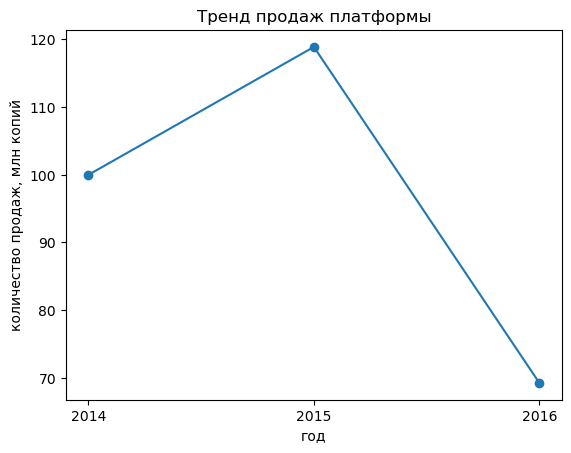

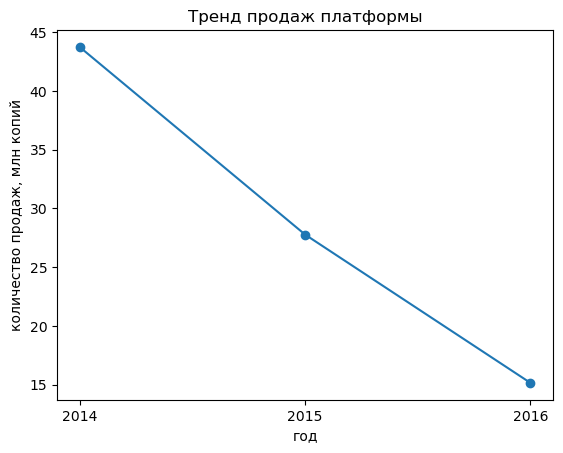

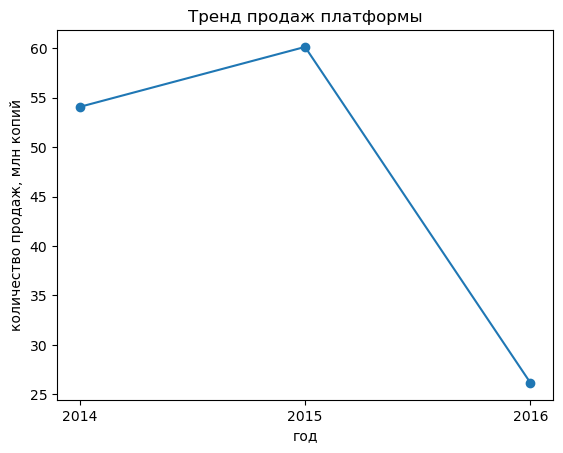

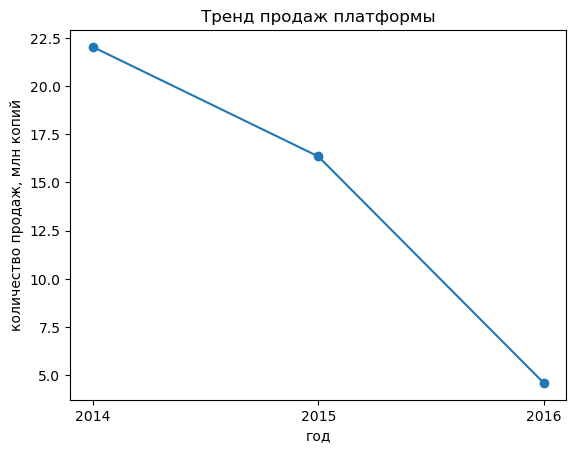

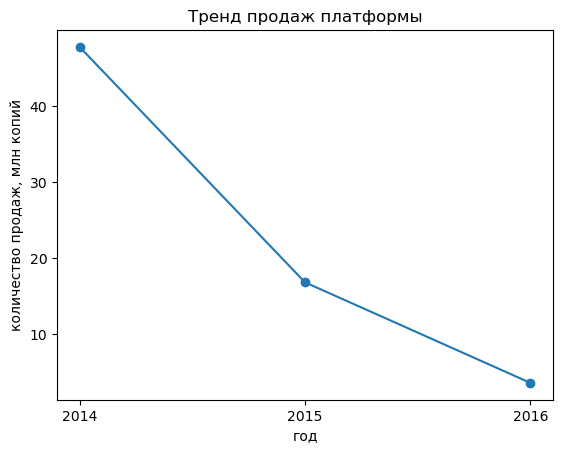

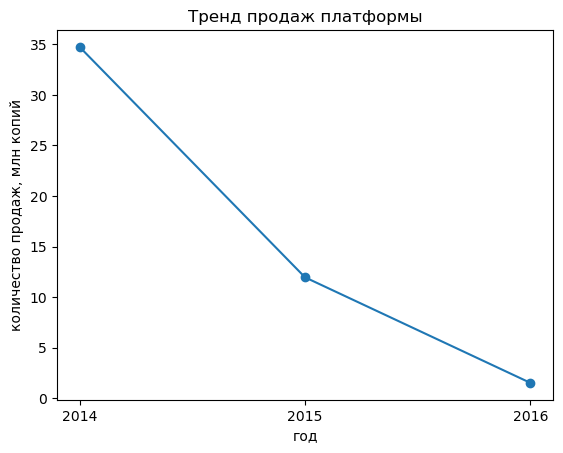

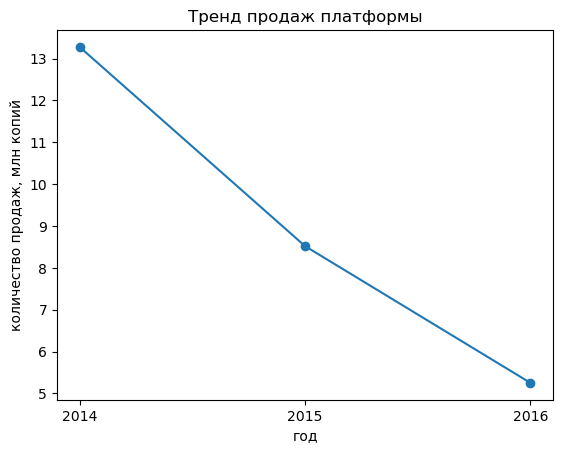

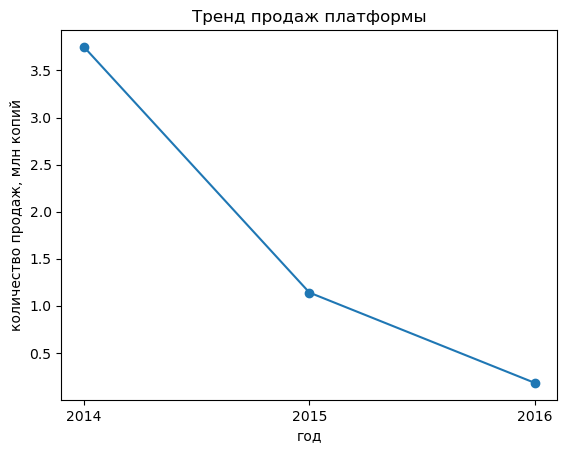

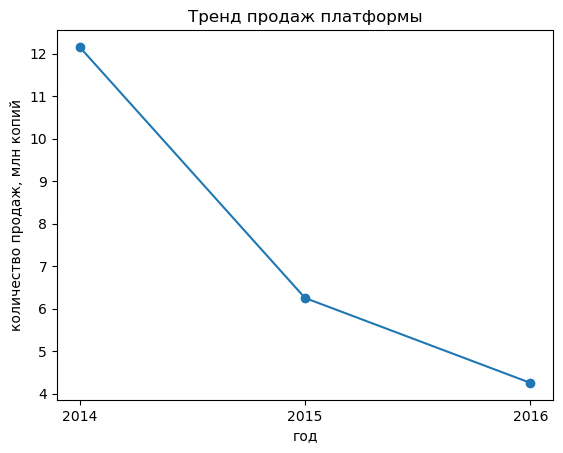

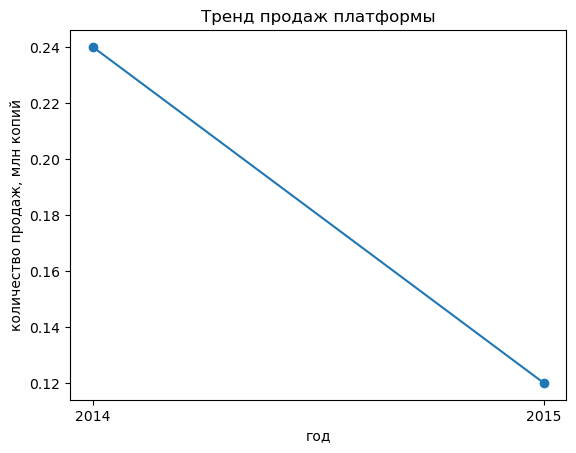

In [33]:
platforms1 = games_actual['platform'].unique()
for v in platforms1:
    platforms_per_years_actual(v)

Все платформы показывают падение продаж в последний год, что вероятно обусловлено общим трендом снижения продаж компьютерных игр. Однако две платформы показывали хороший рост в 2015 году - PS4 и XOne.

Построим диграммы размаха для глобальных продаж различных платформ.

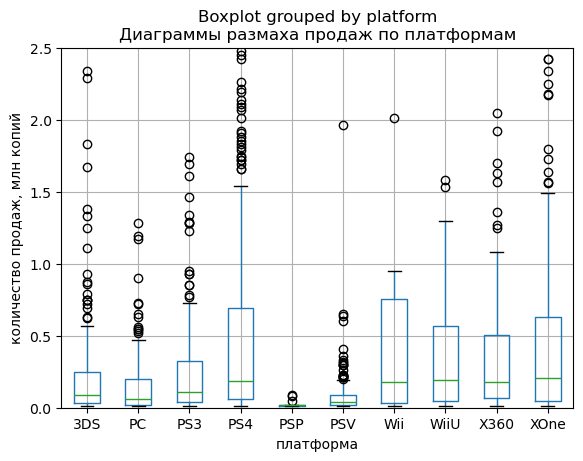

In [34]:
games_actual.boxplot(column='total_sales', by='platform')
plt.ylim(0, 2.5)
plt.title('Диаграммы размаха продаж по платформам')
plt.xlabel('платформа')
plt.ylabel('количество продаж, млн копий');

Межквартильные размахи по глобальным продажам игр по различным платформам составляют 0 - 0,7 млн копий, однако каждая платформа имеет достаточно большое количество статсистических "выбросов" по отдельным играм. <br>
Вероятно, продажи отдельных игр зависят не от платформы, для которой разработана игра, а от других факторов - жанра, оценки критиков, пользователей и т.д.

Рассмотрим влияние оценок критиков и пользователей на продажи в рамках самой популярной платформы - PS4.

In [35]:
def platforms_score(q):
    data = games_actual[games_actual['platform'] == q]
    data.plot(y='total_sales', x='critic_score', kind='scatter', grid=True)
    plt.title('Зависимость продаж от оценки критиков')
    plt.xlabel('оценка критиков')
    plt.ylabel('продажи, млн копий')
    data1 = data[data['user_score'] != 1000]
    data1.plot(y='total_sales', x='user_score', kind='scatter', grid=True)
    plt.title('Зависимость продаж от оценки пользователей')
    plt.xlabel('оценка пользователей')
    plt.ylabel('продажи, млн копий')
    print('Коэффициент корреляции между оценкой критиков и продажами', q, 'составляет', data['total_sales'].corr(data['critic_score']))
    print('Коэффициент корреляции между оценкой пользователей и', q, 'составляет', data1['total_sales'].corr(data1['user_score']))

Коэффициент корреляции между оценкой критиков и продажами PS4 составляет 0.34608941704406593
Коэффициент корреляции между оценкой пользователей и PS4 составляет -0.07906279769721455
Коэффициент корреляции между оценкой критиков и продажами 3DS составляет 0.1700341321682723
Коэффициент корреляции между оценкой пользователей и 3DS составляет 0.055989572266028804
Коэффициент корреляции между оценкой критиков и продажами XOne составляет 0.39411082807194997
Коэффициент корреляции между оценкой пользователей и XOne составляет -0.10445187482312396
Коэффициент корреляции между оценкой критиков и продажами WiiU составляет 0.3491175432623123
Коэффициент корреляции между оценкой пользователей и WiiU составляет 0.34712136081383227
Коэффициент корреляции между оценкой критиков и продажами PS3 составляет 0.1675197202260232
Коэффициент корреляции между оценкой пользователей и PS3 составляет -0.3023348238836853
Коэффициент корреляции между оценкой критиков и продажами X360 составляет 0.254883153537226

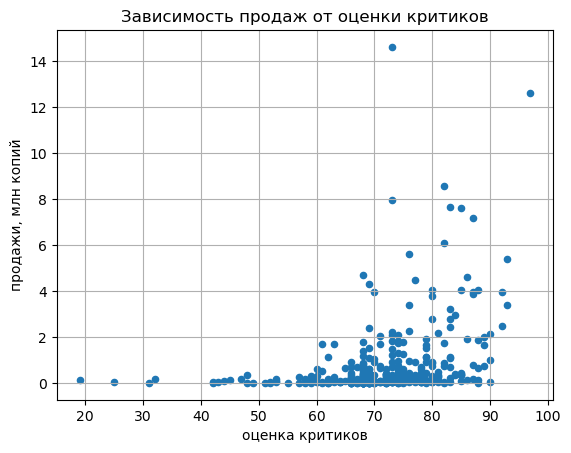

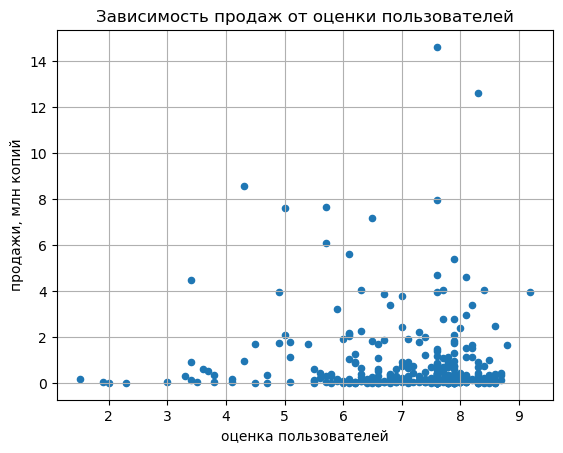

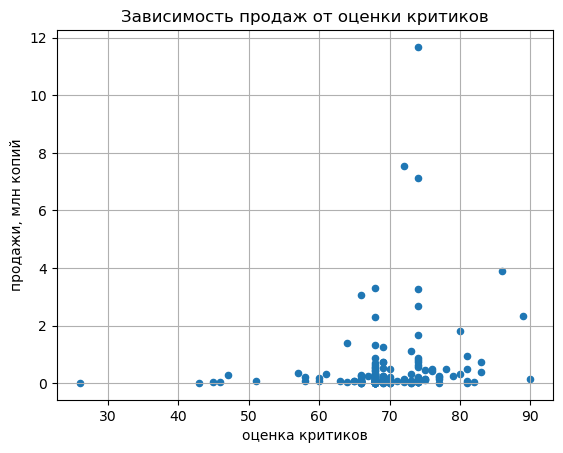

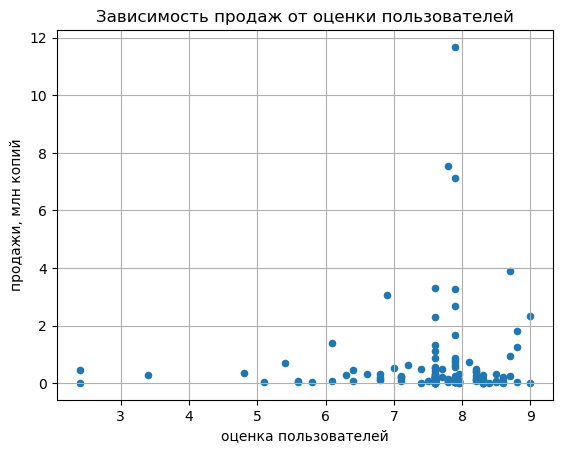

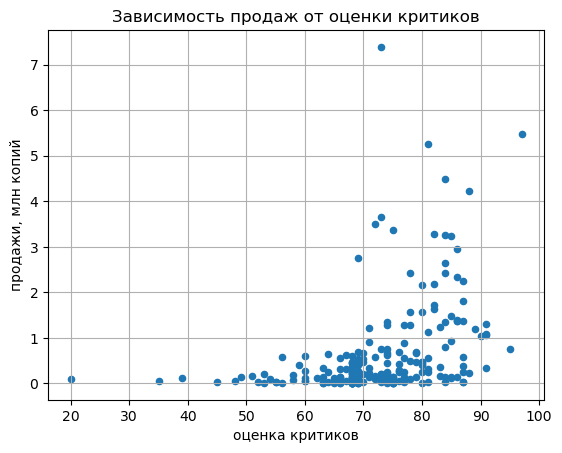

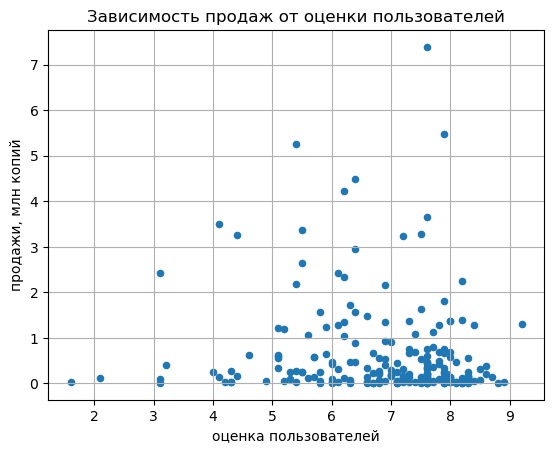

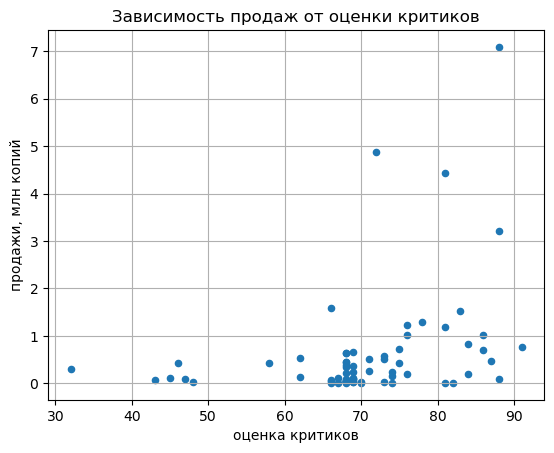

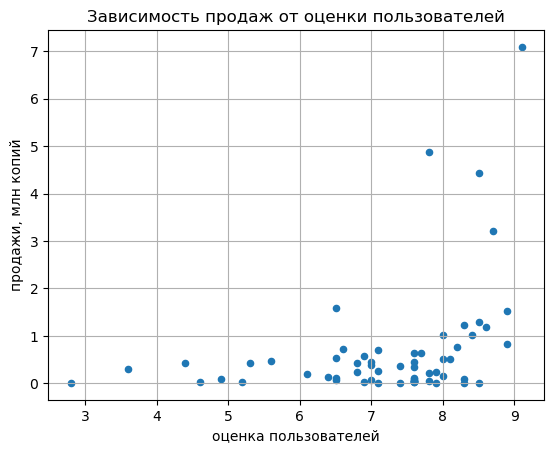

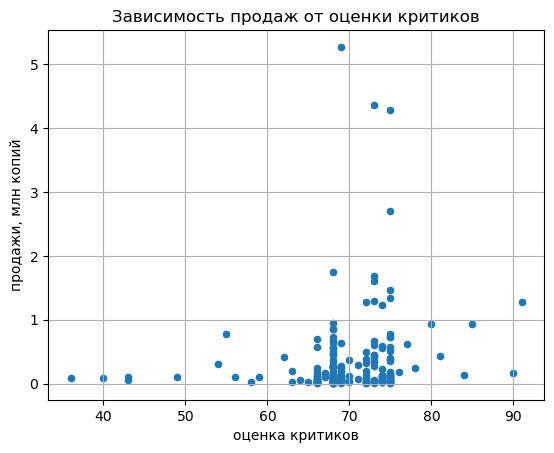

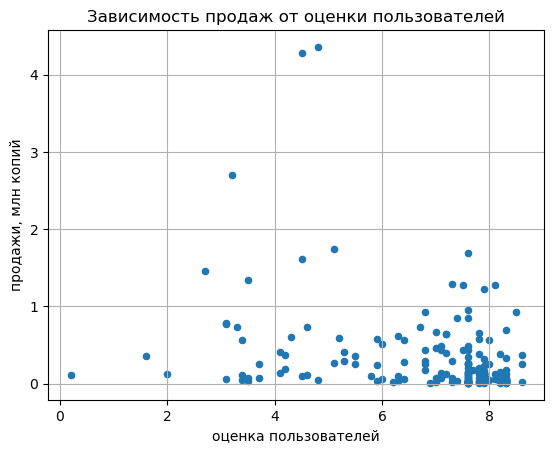

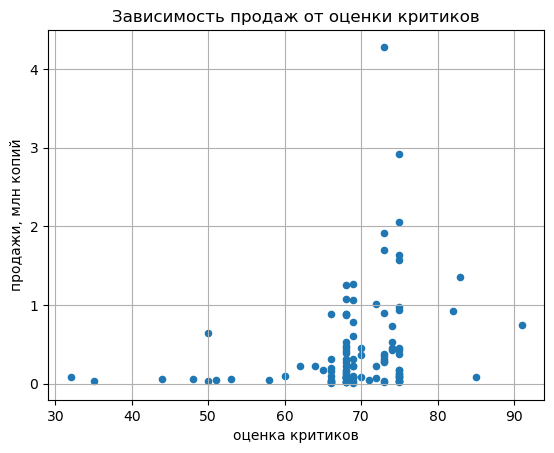

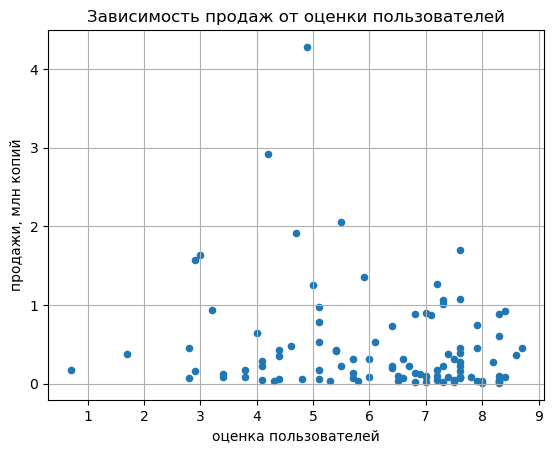

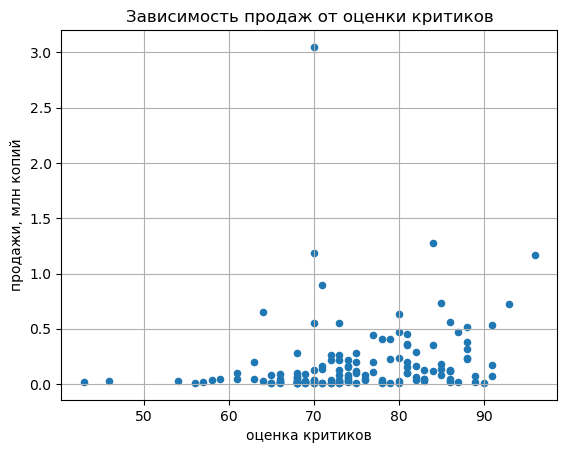

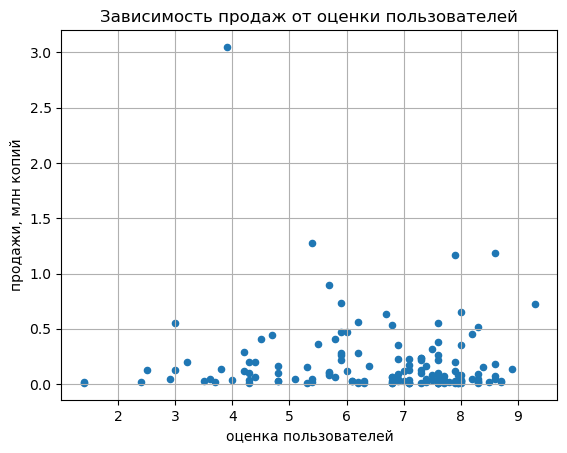

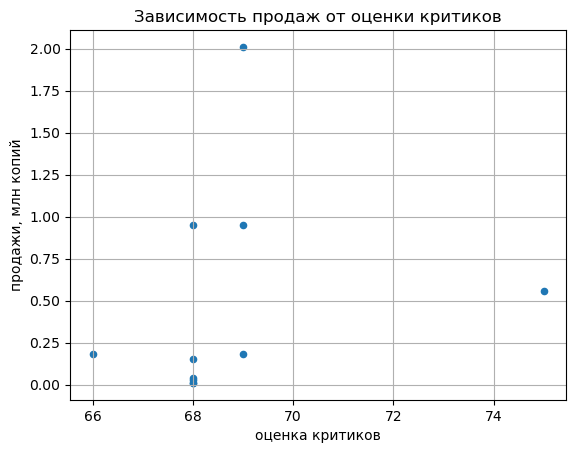

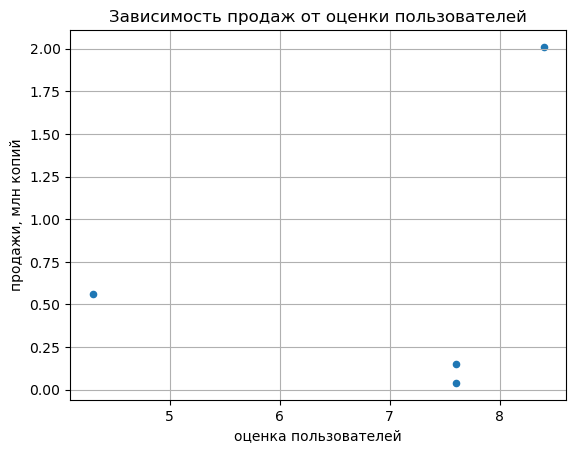

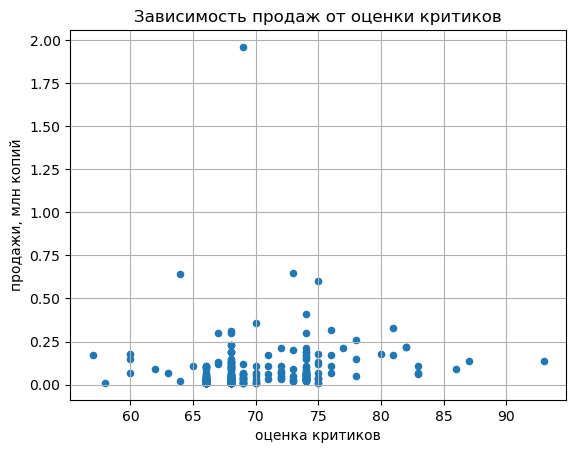

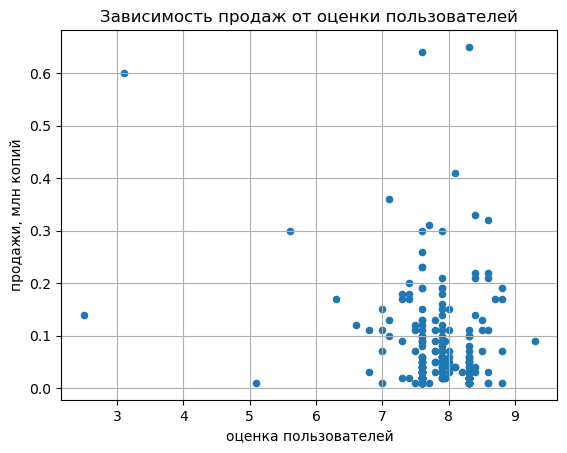

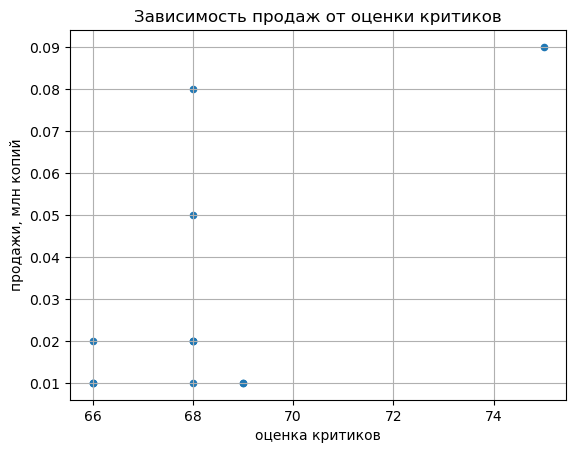

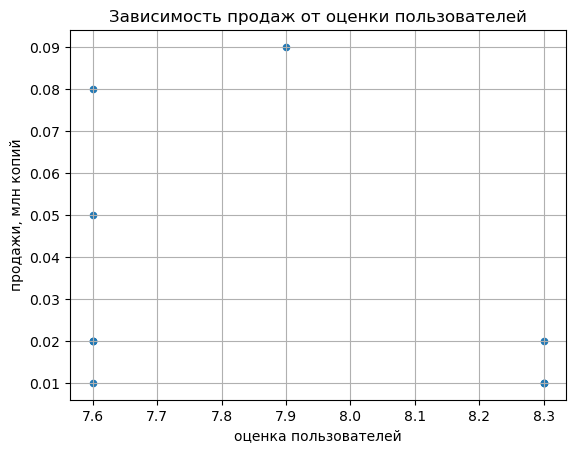

In [36]:
for r in platforms1:
    platforms_score(r)

Исходя из данных графиков и расчётов коэффициентов корреляции, имеется умеренная связь уровня продаж с оценкой критиков и слабая связь с оценкой пользователей.<br>
Либо эти факторы практически не влияют на продажи игр, либо связь этих параметров более сложная, например имеется влияние третьего фактора.

Рассмотрим популярность различных жанров компьютерных игр.

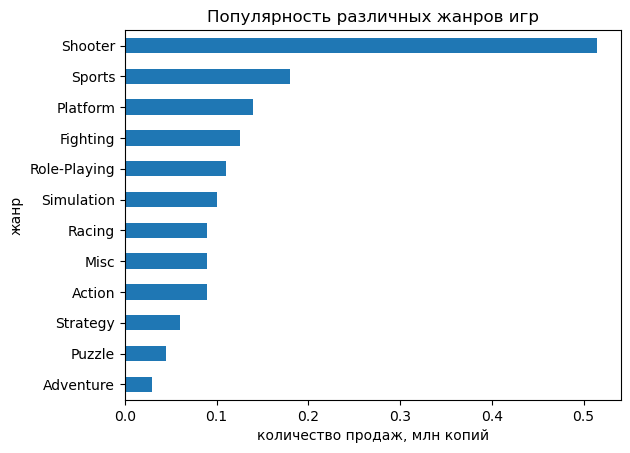

In [37]:
games_genres = games_actual.pivot_table(index='genre', values='total_sales', aggfunc='median')
games_genres.columns = ['median_sales']
games_genres.sort_values(by='median_sales').plot(kind='barh')
plt.title('Популярность различных жанров игр')
plt.ylabel('жанр')
plt.xlabel('количество продаж, млн копий')
plt.legend().set_visible(False);

Наиболее популярным, причём с огромным отрывом, является жанр Shooter. Далее идут Sports, Platform, Fighting и Role-playing. <br>
Наименее популярными являются приключения, стратегии и паззлы.

**Вывод.<br>
Исследовательский анализ данных показал, что расцвет компьютерных игр пришёлся на период 2006-2011 годы. Затем рынок пошёл на спад. <br>
Средняя продолжительность жизни игровой платформы составляет 10 лет, при этом пик популярности платформы приходится на 3-5 год существования.<br>
Поэтому принято решение актуальным периодом для анализа данных и формирования рекомендаций считать период с 2014 по 2016 год. <br>
Наиболее популярными платформами в этот период стали PS4 и XOne, они же показали рост продаж в этот период (2015 год), хотя в целом все платформы показали падение продаж. <br>
Впрочем, это соотносится с общим трендом снижения рынка компьютерных игр.<br>
Моё предположение - это связано с активным развитием бесплатных онлайн-игр, зарабатывающих на платном контенте, а не на продажах самх игр.<br>
Исследование показало маленькие межквартильные размахи по продажам для всех платформ с большим количеством выбросов по отдельным играм.<br>
Кроме того, исследование показало слабую корреляцию продаж с оценкой критиков и пользователей.<br>
В ходе исследования удалось выявить наиболее популярный жанр игр - шутеры.<br>
Из всего этого можно сделать вывод, что при покупке игры пользователь больше всего ориентируется на жанр, редко учитывая оценку критиков и практически не ориентируясь на оценку других пользователей.**

## 4.Формирование портрета пользователя

Сформируем портреты пользователей из различных регионов. <br>
Для этого рассмотрим, какие платформы и жанры пользуются популярностью в разных регионах.

Платформы, популярные в Северной Америке.

In [38]:
na_platforms = games_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na_platforms.columns = ['sum_sales']
total = na_platforms['sum_sales'].sum()
na_platforms['ratio'] = na_platforms['sum_sales']/total*100
na_best = na_platforms.sort_values(by='ratio', ascending=False)
na_best.head()

,sum_sales,ratio
platform,,
PS4,98.61,34.701059
XOne,81.27,28.599078
X360,28.30,9.958827
3DS,22.64,7.967062
PS3,22.05,7.759440


In [39]:
na_best5 = na_best.query('sum_sales > 22')

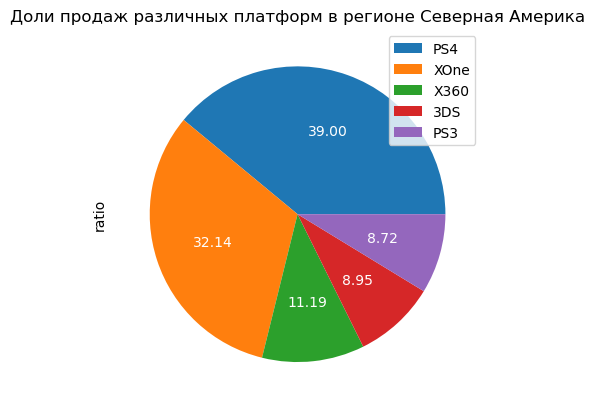

In [40]:
na_best5.plot(kind='pie', y = 'ratio', autopct = '%.2f', textprops=dict(color='w'))
plt.title('Доли продаж различных платформ в регионе Северная Америка');

Платформы, популярные в Европе.

In [41]:
eu_platforms = games_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu_platforms.columns = ['sum_sales']
total = eu_platforms['sum_sales'].sum()
eu_platforms['ratio'] = eu_platforms['sum_sales']/total*100
eu_best = eu_platforms.sort_values(by='ratio', ascending=False)
eu_best.head()

,sum_sales,ratio
platform,,
PS4,130.04,48.033096
XOne,46.25,17.083441
PS3,25.54,9.433753
PC,17.97,6.637609
3DS,16.12,5.954272


In [42]:
eu_best5 = eu_best.query('sum_sales > 16.1')

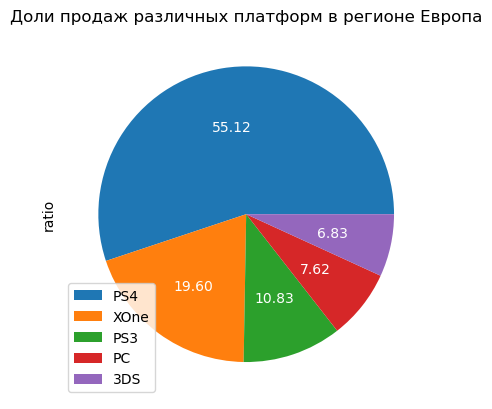

In [43]:
eu_best5.plot(kind='pie', y = 'ratio', autopct = '%.2f', textprops=dict(color='w'))
plt.title('Доли продаж различных платформ в регионе Европа');

Платформы, популярные в Японии.

In [44]:
jp_platforms = games_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_platforms.columns = ['sum_sales']
total = jp_platforms['sum_sales'].sum()
jp_platforms['ratio'] = jp_platforms['sum_sales']/total*100
jp_best = jp_platforms.sort_values(by='ratio', ascending=False)
jp_best.head()

,sum_sales,ratio
platform,,
3DS,44.24,47.488192
PS4,15.02,16.122799
PSV,14.61,15.682696
PS3,11.22,12.043796
WiiU,7.31,7.846715


In [45]:
jp_best5 = jp_best.query('sum_sales > 7.3')

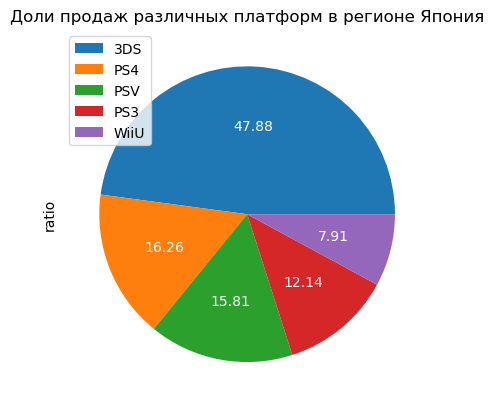

In [46]:
jp_best5.plot(kind='pie', y = 'ratio', autopct = '%.2f', textprops=dict(color='w'))
plt.title('Доли продаж различных платформ в регионе Япония');

В Севеной Америке и Европе двумя самыми популярными платформами являются PS4 и XOne. Они формируют основной рынок компьютерных игр в этих регионах (более 70%). <br>
Различается доля этих платформ по регионам. <br>
В Северной Америке доли продаж этих платформ можно считать почти равными (39 и 32 %).<br>
В то время как в Европе PS4 значительно преобладает (55% против почти 20%). <br>
Совсем другая ситуация в Японии. Там почти половину рынка занимает 3DS (47,88%), в то время как XOne вообще не попала в ТОП-5.

Рассмотрим популярность различных жанров компьютерных игр по регионам.

Популярные жанры в Северной Америке.

In [47]:
na_genres = games_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')
na_genres.columns = ['sum_sales']
na_best_genres = na_genres.sort_values(by='sum_sales', ascending=False)


In [48]:
na_best5_genres = na_best_genres.query('sum_sales > 15.04')

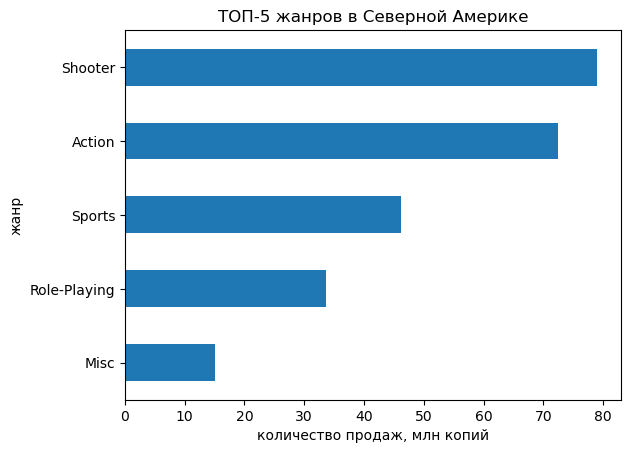

In [49]:
na_best5_genres.sort_values(by='sum_sales').plot(kind='barh')
plt.title('ТОП-5 жанров в Северной Америке')
plt.ylabel('жанр')
plt.xlabel('количество продаж, млн копий')
plt.legend().set_visible(False);

Популярные жанры в Европе.

In [50]:
eu_genres = games_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
eu_genres.columns = ['sum_sales']
eu_best_genres = eu_genres.sort_values(by='sum_sales', ascending=False)


In [51]:
eu_best5_genres = eu_best_genres.query('sum_sales > 14.1')

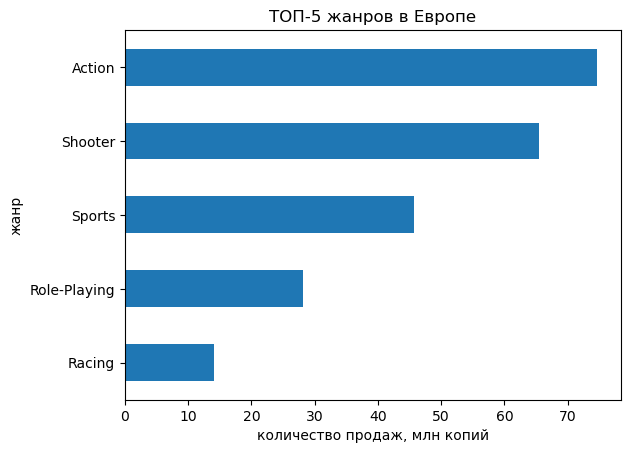

In [52]:
eu_best5_genres.sort_values(by='sum_sales').plot(kind='barh')
plt.title('ТОП-5 жанров в Европе')
plt.ylabel('жанр')
plt.xlabel('количество продаж, млн копий')
plt.legend().set_visible(False);

Популярные  жанры в Японии.

In [53]:
jp_genres = games_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
jp_genres.columns = ['sum_sales']
jp_best_genres = jp_genres.sort_values(by='sum_sales', ascending=False)


In [54]:
jp_best5_genres = jp_best_genres.query('sum_sales > 4.86')

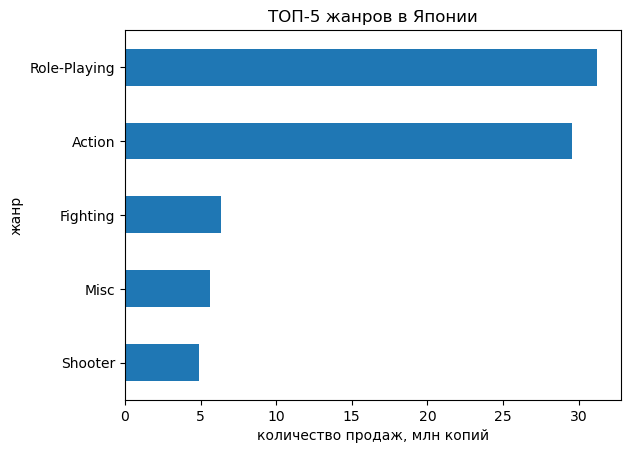

In [55]:
jp_best5_genres.sort_values(by='sum_sales').plot(kind='barh')
plt.title('ТОП-5 жанров в Японии')
plt.ylabel('жанр')
plt.xlabel('количество продаж, млн копий')
plt.legend().set_visible(False);

Самыми популярными жанрами в Северной Америке и Европе являются Экшн и Шутеры. <br>
В Японии Экшн также очень популярен, однако самыми популярными являются ролевые игры.

Рассмотрим, зависимость продаж от рейтинга ESRB.

Продажи по рейтингам в Северной Америке.

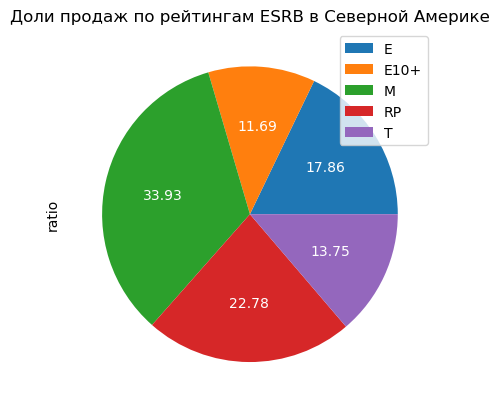

In [56]:
na_rating = games_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_rating.columns = ['sum_sales']
total = na_rating['sum_sales'].sum()
na_rating['ratio'] = na_rating['sum_sales']/total*100
na_rating.plot(kind='pie', y = 'ratio', autopct = '%.2f', textprops=dict(color='w'))
plt.title('Доли продаж по рейтингам ESRB в Северной Америке');

Продажи по рейтингам в Европе.

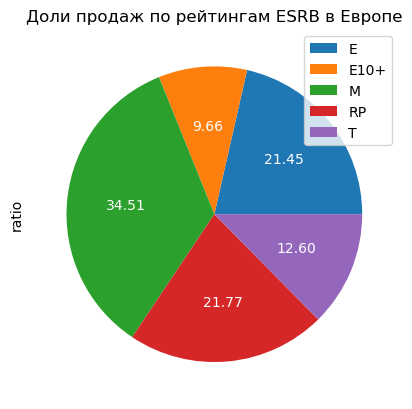

In [57]:
eu_rating = games_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu_rating.columns = ['sum_sales']
total = eu_rating['sum_sales'].sum()
eu_rating['ratio'] = eu_rating['sum_sales']/total*100
eu_rating.plot(kind='pie', y = 'ratio', autopct = '%.2f', textprops=dict(color='w'))
plt.title('Доли продаж по рейтингам ESRB в Европе');

Продажи по рейтингам в Японии.

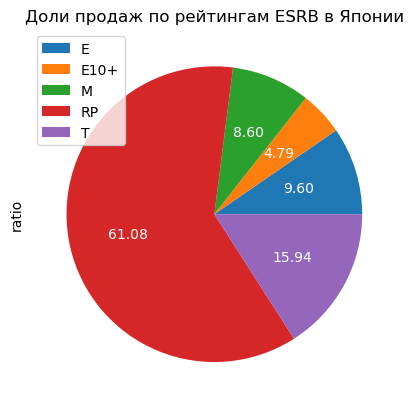

In [58]:
jp_rating = games_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp_rating.columns = ['sum_sales']
total = jp_rating['sum_sales'].sum()
jp_rating['ratio'] = jp_rating['sum_sales']/total*100
jp_rating.plot(kind='pie', y = 'ratio', autopct = '%.2f', textprops=dict(color='w'))
plt.title('Доли продаж по рейтингам ESRB в Японии');

В Северной Америке и Европе лидерами продаж являются игры с рейтингом M (17+). Очевидно, это свидетельствует о том, что при покупке игр пользователи обращают внимание на рейтинг ESRB. <br>
В Японии иная ситуация - более 60% продаж составляют игры с рейтингом RP, т.е. те, у которых не определён рейтинг ESRB. Это свидетельствует об отсутствии значимости данного рейтинга в регионе.<br>
Либо в Японии вообще не принимают во внимание возрастной рейтинг, либо в этом регионе используется другая система рейтингования.

**Вывод.<br>
Портрет пользователя в Северной Америке и Европе в целом очень похож. <br>
Пользователи в этих регионах пользуются одними платформами и предпочитают одни жанры компьютерных игр.<br>
Имеются небольшие различия в распределении предпочтений внутри факторов. <br>
Совсем другая история - Япония.<br>
Здесь иные предпочтения по игровым платформам и жанрам.<br>
Кроме того пользователи не учитывают рейтинг ESRB, популярный в Северной Америке и Европе.**

## 5. Проверка гипотез

Проверим гипотезу о том, что средние пользовательские рейтинги для платформ XOne и PC одинаковые.

Сформируем нужные датафреймы.

In [59]:
games_pc = games_actual[games_actual['platform'] == 'PC']
games_pc1 = games_pc[games_pc['user_score'] != 1000]
games_xone = games_actual[games_actual['platform'] == 'XOne']
games_xone1 = games_xone[games_xone['user_score'] != 1000]

Нулевая гипотеза - средние пользовательские рейтинги платформ PC и XOne равны. <br>
Альтернативная гипотеза - средние пользовательские рейтинги данных платформ не равны.

In [60]:
alpha = 0.05
results = st.ttest_ind(games_pc1['user_score'], games_xone1['user_score'])
print(results.pvalue)
if results.pvalue < alpha:
      print('Отвергаем нулевую гипотезу')
else:
      print('Нет оснований отвергнуть нулевую гипотезу')

0.03343191414664772
Отвергаем нулевую гипотезу


Существует вероятность всего 3.3% случайно получить такое или большее различие между средними пользовательскими рейтингами платформ. <br>
Поэтому полученные различия скорее всего будут свидетельствовать о действительно разных средних рейтингах.

Проверим гипотезу о различии средних пользовательских рейтингов жанров Action и Sports.

Сформируем нужные датафреймы.

In [61]:
games_action = games_actual[games_actual['genre'] == 'Action']
games_action1 = games_action[games_action['user_score'] != 1000]
games_sports = games_actual[games_actual['genre'] == 'Sports']
games_sports1 = games_sports[games_sports['user_score'] != 1000]

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны. <br>
Альтернативная гипотеза - средние пользовательские рейтинги данных жанров не равны.

In [62]:
alpha = 0.05
results = st.ttest_ind(games_action['user_score'], games_sports['user_score'])
print(results.pvalue)
if results.pvalue < alpha:
      print('Отвергаем нулевую гипотезу')
else:
      print('Нет оснований отвергнуть нулевую гипотезу')

0.8558645682874653
Нет оснований отвергнуть нулевую гипотезу


Существует вероятность более 85% случайно получить такое или большее различие между средними пользовательскими рейтингами жанров. <br>
Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.

## 6. Выводы

**В целях анализа рынка компьютерных игр и ормирования рекомендаций для запуска успешного продукта была проведена следующая работа. <br>
Проведён общий обзор данных, выявивший проблемы с качеством данных. <br>
Следует отметить, что необходимы улучшения в части сбора данных. Кроме в такой динамично развивающейся отрасли не имеет смысла сбор ретроспективных данных.<br>
В ходе предобработки удалось существенно улучшить качество данных и подготовить их для дальнейшего исследования.<br>
Исследовательский анализ данных показал общий тренд снижения рынка компьютерных игр, но позволило выявить наиболее популярные платформы, которые сумели показать рост продаж в 2015 году.<br>
Моё предположение - это связано с активным развитием бесплатных онлайн-игр, зарабатывающих на платном контенте, а не на продажах самх игр.<br>
Исследование показало маленькие межквартильные размахи по продажам для всех платформ с большим количеством выбросов по отдельным играм.<br>
Кроме того, исследование показало слабую корреляцию продаж с оценкой критиков и пользователей.<br>
В ходе исследования удалось выявить наиболее популярный жанр игр - шутеры.<br>
Из всего этого можно сделать вывод, что при покупке игры пользователь больше всего ориентируется на жанр, редко учитывая оценку критико и практически не ориентируясь на оценку других пользователей. <br>
Портрет пользователя в Северной Америке и Европе в целом очень похож. <br>
Пользователи в этих регионах пользуются одними платформами и предпочитают одни жанры компьютерных игр.<br>
Имеются небольшие различия в распределении предпочтений внутри факторов. <br>
Совсем другая история - Япония.<br>
Здесь иные предпочтения по игровым платформам и жанрам.<br>
Кроме того пользователи не учитывают рейтинг ESRB, популярный в Северной Америке и Европе. <br>
В ходе проверки гипотез не удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов двух платформ, однако удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов для различных жанров.<br>
Всё вышеизложенное подтверждает предположение о том, что пользователи больше всего ориентируются на жанр компьютерных игр.<br>
При запуске нового продукта следует учитывать регион присутствия, т.к. портрет пользователя в Северной Америке и Европе отличается от такового в Японии.<br>
Если говорить о наиболее успешном глобаьном проекте, то стоит обратить внимание на жанр Экшн, т.к. он популярен во всех регионах.<br>
Выбор платформы следует осуществлять исходя из региона - PS4 или XOne для Северной Америки и Европы, 3DS - для Японии.<br>
Также стоит учесть, вывод продукта на американский и европейский рынок потребует рейтингования ESRB, т.к. пользователи обращают внимание на рейтинг в этих регионах, выбирая в большинстве случаев рейтинг M.<br>
Для Японии данным фактором можно пренебречь.**